Naive-Bayes Classifier-Supervised Learning Algorithm<br>
Mainly used for text classification<br>
Based on Bayes Theorem<br>
Seeing Accuracy of model for various datasets

To read csv file

In [15]:
import pandas as pd
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing Algorithm
from sklearn.naive_bayes import GaussianNB
# For checking/Evaluating accuracy of model and printing the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
# For Plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA
# For converting string to int
from sklearn.preprocessing import LabelEncoder

Data Gathering<br>
Glucose and blood pressure as input and diabetes as output<br>
Model will predict if person is diabetic or not

In [16]:
data=pd.read_csv("Naive-Bayes-Classification-Data.csv")
print("Data is:\n",data)
print("Information about Dataframe is:\n",data.info)

Data is:
      glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

[995 rows x 3 columns]
Information about Dataframe is:
 <bound method DataFrame.info of      glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82

Data Preprocessing is not required as data is already cleaned<br>
Splitting between Input(X) and Output(Y)

In [17]:
X,Y=data.drop("diabetes",axis=1),data['diabetes']
print("Input is:\n",X,"\n","Output is:\n",Y)
# Splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Shape of x_train(training data) for dataset is:",x_train.shape,"Shape of y_train(testing data) for dataset is:",y_train.shape)

Input is:
      glucose  bloodpressure
0         40             85
1         40             92
2         45             63
3         45             80
4         40             73
..       ...            ...
990       45             87
991       40             83
992       40             83
993       40             60
994       45             82

[995 rows x 2 columns] 
 Output is:
 0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64
Shape of x_train(training data) for dataset is: (796, 2) Shape of y_train(testing data) for dataset is: (796,)


Choosing algorithm

In [18]:
nb=GaussianNB()
# Training the model
nb.fit(x_train,y_train)

GaussianNB()

Evaluating/Testing the model

In [19]:
print("Training Accuracy is:",nb.score(x_train,y_train)*100)
predicted_data=nb.predict(x_test)
print("Predicted Data is:\n",predicted_data)
print("Testing Accuracy is:",accuracy_score(y_test,predicted_data)*100)
# Printing Confusion Matrix
print("Confusion Matrix is:\n",confusion_matrix(y_test,predicted_data))

Training Accuracy is: 93.96984924623115
Predicted Data is:
 [0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 0 1 1 0 1 1]
Testing Accuracy is: 90.95477386934674
Confusion Matrix is:
 [[89 10]
 [ 8 92]]


Plotting according to diabetic or not

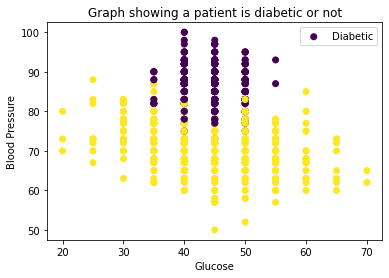

In [20]:
plt.scatter(X["glucose"],X["bloodpressure"],c=Y)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.legend(['Diabetic'])
plt.title("Graph showing a patient is diabetic or not")
plt.show()

For Another dataset<br>
To predict if income is greater than 50K based on several parameters<br>
Importing CSV

In [21]:
data= pd.read_csv("adult.csv")
print("Dataframe is:")
print("Columns in dataframe are:",data.columns)

Dataframe is:
Columns in dataframe are: Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


Error as column cannot be converted to int/float<br>
X,Y=data.drop([' State-gov',' Bachelors',' Never-married', ' Adm-clerical',' Not-in-family',' White', ' Male',' United-States'],axis=1),data[' <=50K'].astype(float,errors='raise')<br>
print("Input is:\n",X,"\n","Output is:\n",Y)<br>
data=pd.read_csv("adult.csv", usecols=['39', ' 77516', ' 13', ' 2174', ' 0',' 40', ' <=50K']) we can use this as well if we do not want to convert

Converting to int to use in model

In [22]:
print(set(data[' State-gov']))
le= LabelEncoder()
print("Data after converting is: \n",set(le.fit(data[' State-gov']).transform(data[' State-gov'])))
print("Demonstration of le.fit is:\n")
print(le.classes_)

{' Self-emp-inc', ' Never-worked', ' State-gov', ' Without-pay', ' Self-emp-not-inc', ' Local-gov', ' ?', ' Private', ' Federal-gov'}
Data after converting is: 
 {0, 1, 2, 3, 4, 5, 6, 7, 8}
Demonstration of le.fit is:

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


Function to convert string values to numeric values

In [23]:
func = lambda i:le.fit(data[i]).transform(data[i])
for i in data.columns:
    data[i]=func(i)
print(data)

       39   State-gov   77516   Bachelors   13   Never-married   Adm-clerical  \
0      33           6    2925           9   12               2              4   
1      21           4   14085          11    8               0              6   
2      36           4   15335           1    6               2              6   
3      11           4   19354           9   12               2             10   
4      20           4   17699          12   13               2              4   
...    ..         ...     ...         ...  ...             ...            ...   
32555  10           4   16527           7   11               2             13   
32556  23           4    8079          11    8               2              7   
32557  41           4    7882          11    8               6              1   
32558   5           4   12880          11    8               4              1   
32559  35           5   17824          11    8               2              4   

        Not-in-family   Whi

Separating Input and Output

In [24]:
X,Y=data.drop(' <=50K',axis=1),data[' <=50K']
# Splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

Choosing algorithm

In [25]:
nb=GaussianNB()
# Training the model
nb.fit(x_train,y_train)

GaussianNB()

Evaluate/Test the model

In [26]:
print("Training Accuracy is:",nb.score(x_train,y_train)*100)
predicted_data=nb.predict(x_test)
print("Predicted Data is:\n",predicted_data)
print("Testing Accuracy is:",accuracy_score(y_test,predicted_data)*100)
print("Confusion Matrix is:\n",confusion_matrix(y_test,predicted_data))

Training Accuracy is: 81.9909398034398
Predicted Data is:
 [0 0 0 ... 0 0 0]
Testing Accuracy is: 81.58783783783784
Confusion Matrix is:
 [[4564  349]
 [ 850  749]]


Plotting graph for complete dataset<br>
PCA (Principle component analysis)<br>
Dimension reduction of data<br>
As we cannot plot with multiple dimensions<br>
Dimensions will be reduced to 2

In [27]:
x=PCA(n_components=2)
pca_data=x.fit_transform(X)
print(x.fit_transform(X))
print(pca_data.shape)

[[-7.57325415e+03 -7.38840726e+00]
 [ 3.58674676e+03 -6.32616888e+00]
 [ 4.83674430e+03 -4.72257670e+00]
 ...
 [-2.61625662e+03 -4.46236583e+00]
 [ 2.38175040e+03 -9.67412595e+00]
 [ 7.32574232e+03  1.02294747e+02]]
(32560, 2)


Plotting

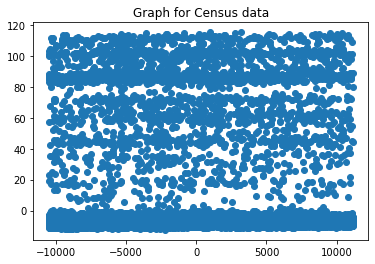

In [28]:
# Since the dataset is very big, the plot is messy and dosen't display any useful information

plt.scatter(pca_data[:,0],pca_data[:,1])
plt.title("Graph for Census data")
plt.show()